<a href="https://colab.research.google.com/github/bithi-6535/bithi-6535/blob/main/ML_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [16]:
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
y=df.Species
x=df.iloc[:, :-1]


In [18]:
print(x.shape)
print(y.shape)
x.head()

(150, 5)
(150,)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [19]:
rf_model=RandomForestClassifier(random_state=0)
cv_scores=cross_val_score(rf_model,x,y,cv=5, scoring='accuracy')
print("Cross-validation scores:",cv_scores)
print("Mean CV accuracy:",cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.93333333]
Mean CV accuracy: 0.9866666666666667


In [9]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder

#y = y.values.reshape(-1,1)
ordinal_encoder=OrdinalEncoder()
X_train,X_test,y_train,y_test=train_test_split(X,Y, train_size=0.8,
                                               random_state=0,
                                               test_size=0.2)
model=xgb.XGBClassifier(tree_method="hist",early_stopping_rounds=2)
model.fit(x_train, y_train, eval_set=[(x_test,y_test)])
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Train accuracy: {train_score:.3f}")
print("Test accuracy:{test_score:.3f}")


NameError: name 'X' is not defined

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score


In [22]:
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [24]:
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [25]:
print("\n Descriptive statistics:")
df.describe()


 Descriptive statistics:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.notnull().sum()

,0
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


<Axes: xlabel='Species', ylabel='count'>

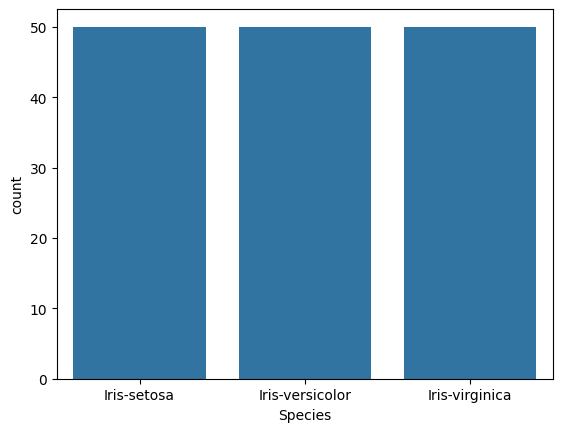

In [ ]:
sns.countplot(x='Species',data=df)

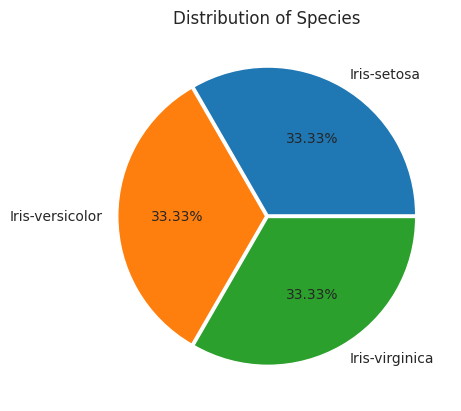

In [ ]:
y=df['Species'].value_counts().tolist()
my_labels=df['Species'].unique().tolist()
my_explode=[0.01,0.01,0.01]
plt.pie(y, labels=my_labels, explode=my_explode, autopct='%1.2f%%')
sns.set_style("white")
plt.title('Distribution of Species')
plt.show()

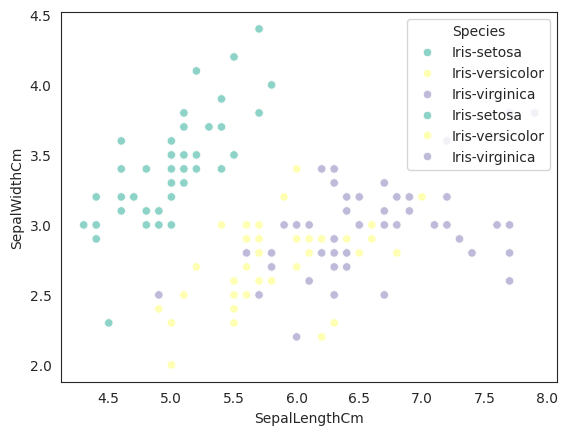

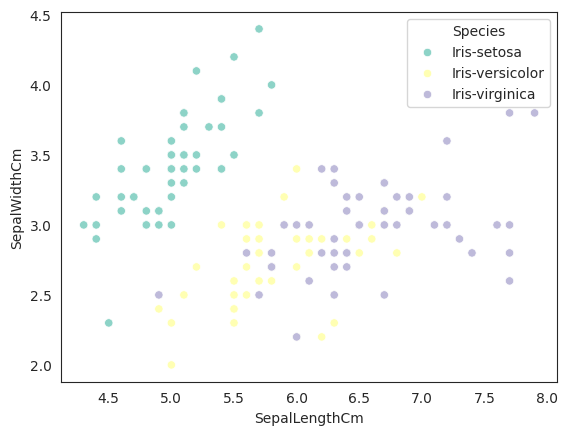

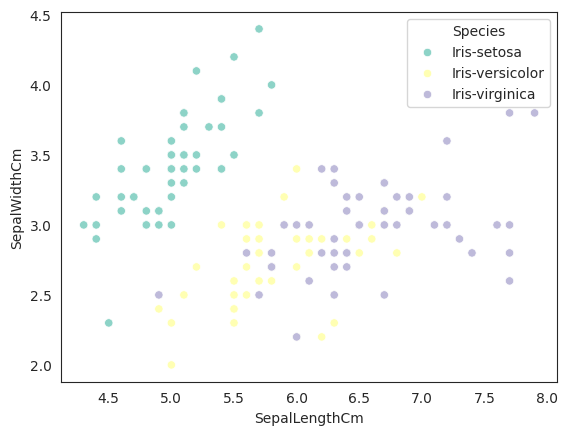

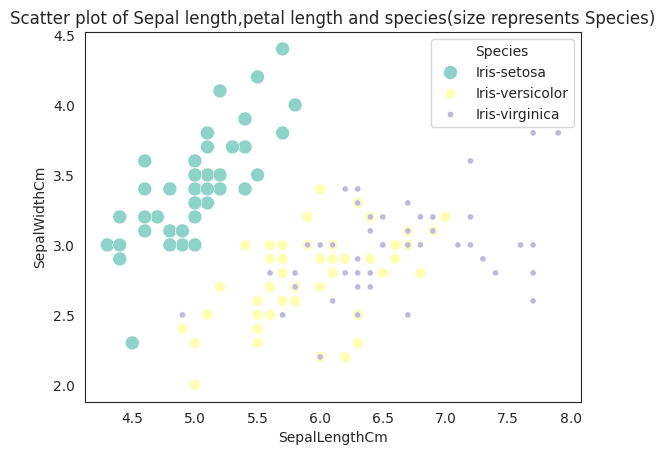

In [ ]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,
                palette="Set3")
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,
                palette="Set3")
plt.show()

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species',
                data=df, palette='Set3', sizes=(20,100))
plt.show()
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species', data=df,
                palette='Set3')
plt.show()
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species',data=df,
                size='Species',palette='Set3',sizes=(20,100))
plt.title('Scatter plot of Sepal length,petal length and species(size represents Species)')
plt.show()



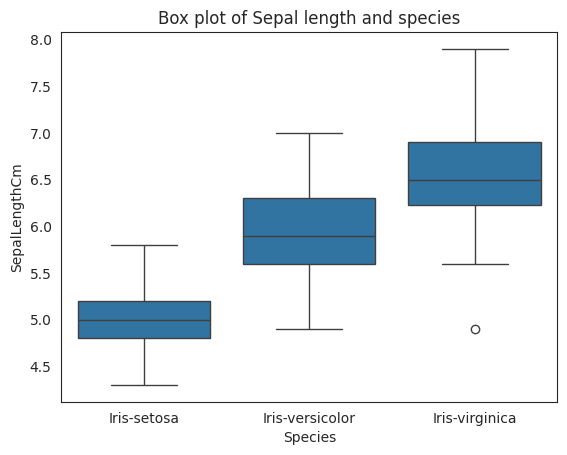

In [ ]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df,)
plt.title('Box plot of Sepal length and species')
plt.show()

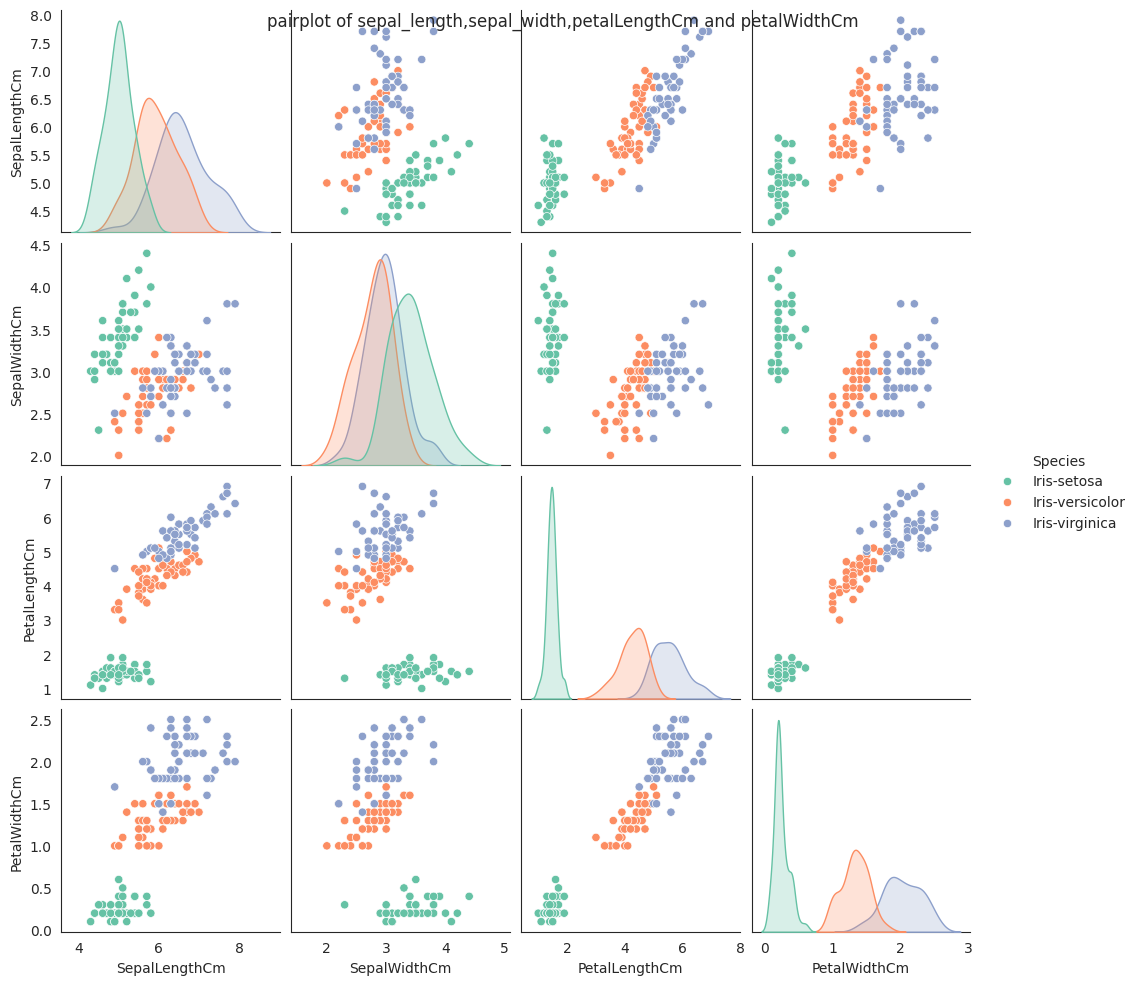

In [ ]:
columns_to_visualize=['SepalLengthCm','SepalWidthCm','PetalLengthCm',
                      'PetalWidthCm','Species']
sns.pairplot(df[columns_to_visualize],hue='Species',palette='Set2')
plt.suptitle("pairplot of sepal_length,sepal_width,petalLengthCm and petalWidthCm")
plt.show()

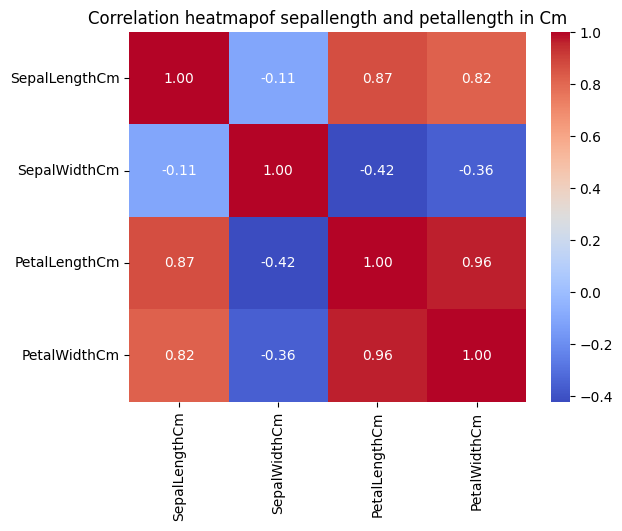

In [27]:
columns_to_visualize= ['SepalLengthCm','SepalWidthCm','PetalLengthCm',
                       'PetalWidthCm']
correlation_matrix=df[columns_to_visualize].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmapof sepallength and petallength in Cm')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=df.drop('Species',axis=1)
y=df['Species']
print(x.head)
print(y.head)
print(x.shape)
print(type(x))

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]>
<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
 

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df.Species)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,
                                                  random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
svm_model=make_pipeline(StandardScaler(),SVC(kernel='linear', probability=True))
random_forest_model=RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
svm_model.fit(x_train,y_train)
random_forest_model.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)
acc=accuracy_score(y_pred_svm,y_test)
print(f"SVM Accuracy: {acc}")
print(f"RF Accuracy: {acc:.2f}")

SVM Accuracy: 1.0
RF Accuracy: 1.00


In [39]:
#The confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm=confusion_matrix(y_pred_svm,y_test)
cm_svm


array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 11]])

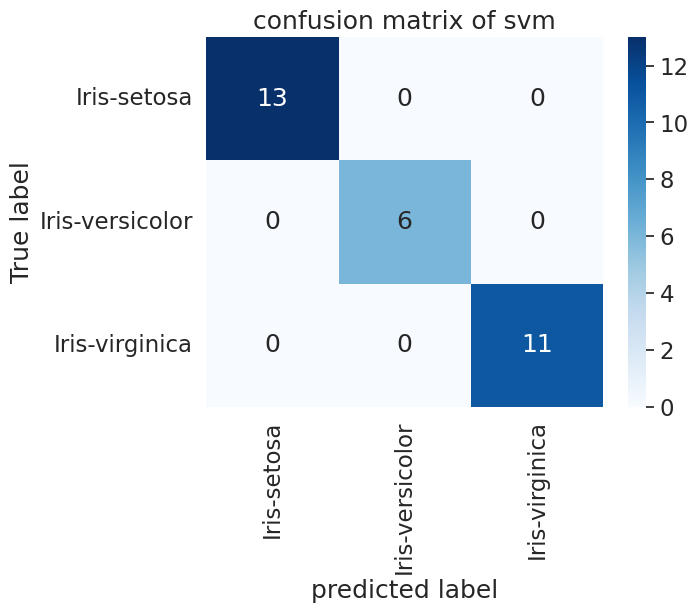

In [35]:
sns.set(font_scale=1.5)
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues', xticklabels=df['Species'].
           unique().tolist(), yticklabels=df['Species'].unique().tolist())
plt.title('confusion matrix of svm')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()

In [41]:
cr= classification_report(y_pred_svm,y_test)
print(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
acc=accuracy_score(y_pred_svm,y_test)
print(acc)

1.0


<Figure size 800x500 with 0 Axes>

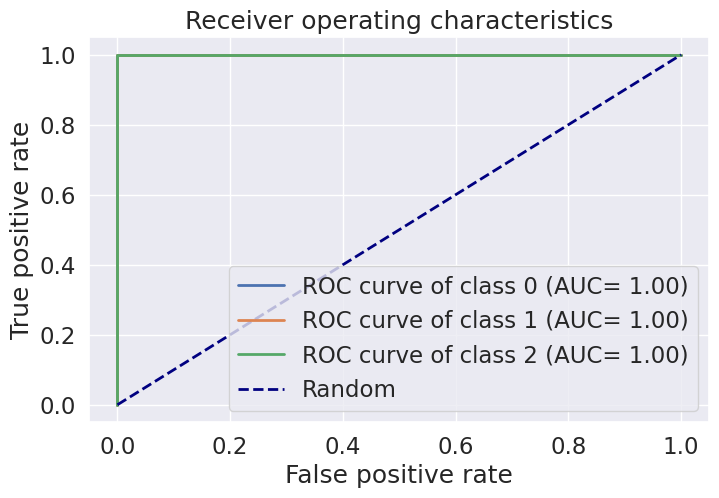

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
#assuming y_test and y_pred are with multiple classes
#convert them into binary format using label binarize
y_test_bin=label_binarize(y_test, classes=[0,1,2]) #spotify your cls labels
y_pred_bin=label_binarize(y_pred_svm, classes=[0,1,2])
#compute roc curve and roc area for each cls
fpr= dict()
tpr= dict()
roc_auc= dict()
n_classes=y_test_bin.shape[1]
for i in range(n_classes):
  fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_pred_bin[:,i])
  roc_auc[i]=auc(fpr[i], tpr[i])
plt.figure(figsize=(8,5))
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
#assuming y_test and y_pred are with multiple classes
#convert them into binary format using label binarize
y_test_bin=label_binarize(y_test, classes=[0,1,2]) #spotify your cls labels
y_pred_bin=label_binarize(y_pred_svm, classes=[0,1,2])
#compute roc curve and roc area for each cls
fpr= dict()
tpr= dict()
roc_auc= dict()
n_classes=y_test_bin.shape[1]
for i in range(n_classes):
  fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_pred_bin[:,i])
  roc_auc[i]=auc(fpr[i], tpr[i])
plt.figure(figsize=(8,5))
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i], lw=2,label= f'ROC curve of class {i} (AUC= {roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--',label='Random')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics')
plt.legend(loc='lower right')
plt.show()





In [67]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model_1=RandomForestClassifier(n_estimators=100, random_state=42)
model_2=LogisticRegression()
model_3=SVC(probability=True, random_state=42)
model_4=KNeighborsClassifier()
classifiers=[('Random Forest',model_1),
             ('Logistic Regression',model_2),
             ('SVM', model_3),
             ('KNN',model_4)]
voting_classifier=VotingClassifier(estimators=classifiers, voting='hard')
voting_classifier.fit(x_train,y_train)
predictions=voting_classifier.predict(x_test)
print(accuracy_score(predictions,y_test))

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
svm_cv_scores=cross_val_score(svm_model,x_train,y_train,cv=5)
rf_cv_scores=cross_val_score(random_forest_model,x_train,y_train,cv=5)
print("\nCross-validation scores:")
print("SVM: ", svm_cv_scores)
print(f"Mean accuracy- SVM:{svm_cv_scores.mean():.2f}")
print("Random Forest: ", rf_cv_scores)
print(f"Mean accuracy-Random Forest:{rf_cv_scores.mean():.2f}")


Cross-validation scores:
SVM:  [1. 1. 1. 1. 1.]
Mean accuracy- SVM:1.00
Random Forest:  [1.         1.         1.         1.         0.95833333]
Mean accuracy-Random Forest:0.99


In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100, random_state=42)
stratified_Kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
cv_results=cross_val_score(classifier,x,y,cv=stratified_Kfold,
                           scoring='accuracy')
print(cv_results)
print(f"Mean accuracy: {cv_results.mean():.2f}")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.00
